### seaborn的图表
- 数值相关性
- 数据分布
- 分类数据对比
- 回归模型


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

seaborn有figure-level和axes-levle层级的两种图表，

在相关性分析的图表中我们通常会使用relplot，relplot是figure-level的图表，散点图和线图我们可以通过参数kind获取，

当然你也可以直接使用axes-levle的图表，如使用scatterplot()，lineplot()来进行图表的绘制：

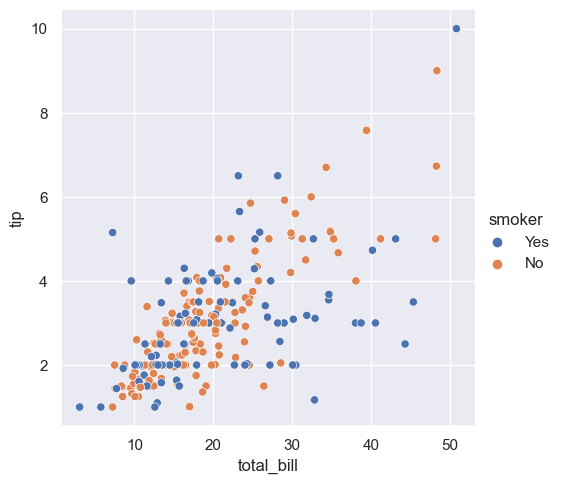

In [5]:
# 颜色（HUE）
tips = sns.load_dataset("tips", data_home='seaborn_sample')
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

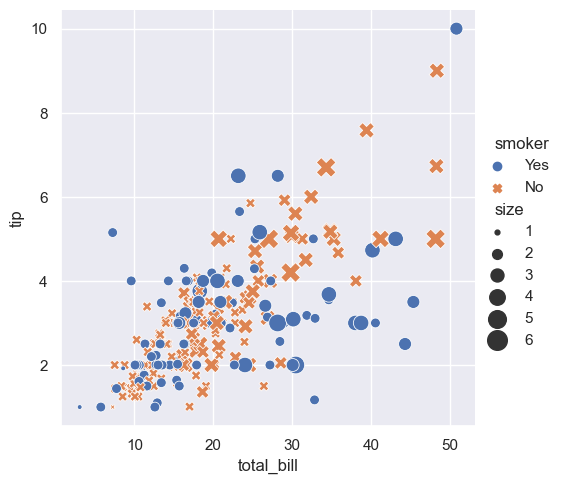

In [8]:
# 点样式（style）
# sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

# 图形大小（size）
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", size="size", sizes=(12, 200), data=tips)

折线图（Lineplot）

散点图在应用于数据相关性分析时确实非常高效，但并非适用于所有的场景，比如我们想分析数值随着时间的变化情况，这种情况下可能使用折线图就会更加合适一些；

在seaborn中我们可以直接使用lineplot直接进行绘制，也可以通过kind="line"来使用relplot来进行绘制；

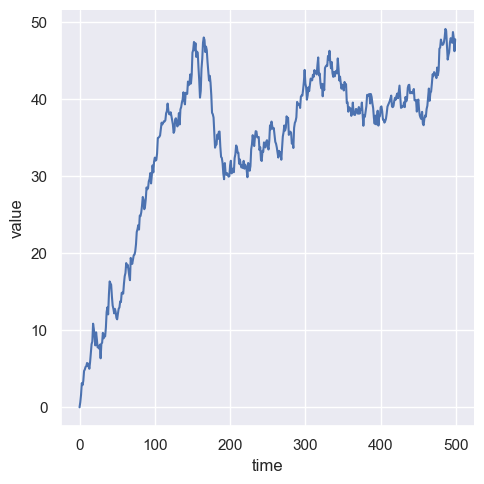

In [9]:
df = pd.DataFrame(dict(time=np.arange(500),
                  value=np.random.randn(500).cumsum()))

g = sns.relplot(x="time", y="value", kind="line", data=df)

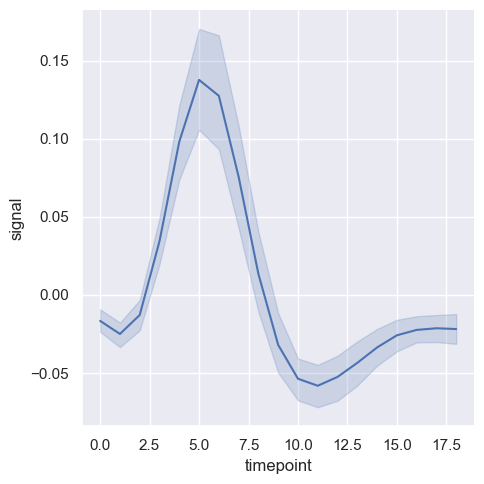

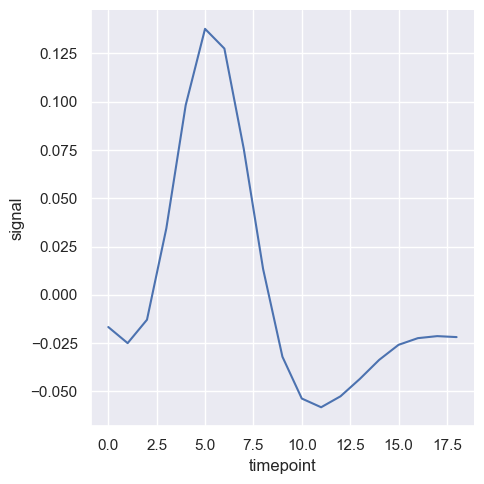

In [15]:
fmri = sns.load_dataset("fmri", data_home='seaborn_sample')
# fmri.head(10)
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
sns.relplot(x="timepoint", y="signal", kind="line", errorbar=None, data=fmri)

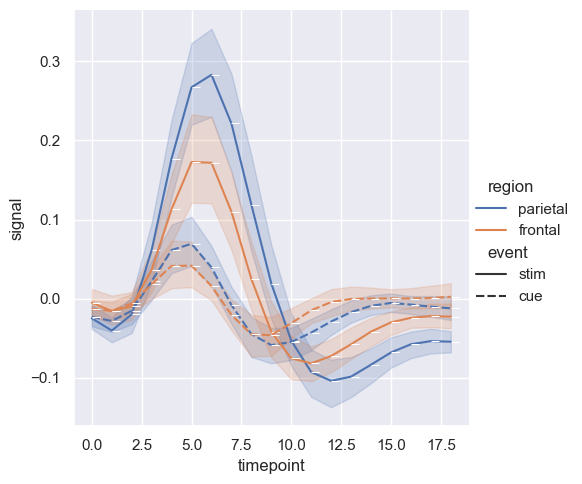

In [16]:
# 线样式（style）
sns.relplot(x="timepoint", y="signal", hue="region", kind="line", style="event", marker=True, data=fmri)

### 分布型图表
分布型图表主要包含axes-level的图表有直方图（histplot）,核密度分布图（kedplot）和累积概率密度图（ecdfplot），除此之外还有rugplot，但与前三者不同的是rugplot是可以被添加到以上任意图形中去的;

figure-level的图表为displot，我们同样是通过参数kind去展示axes-level级别的图表，默认是使用histplot，如下所示；

当我们不传递y的数据时，默认是进行计数（count）；

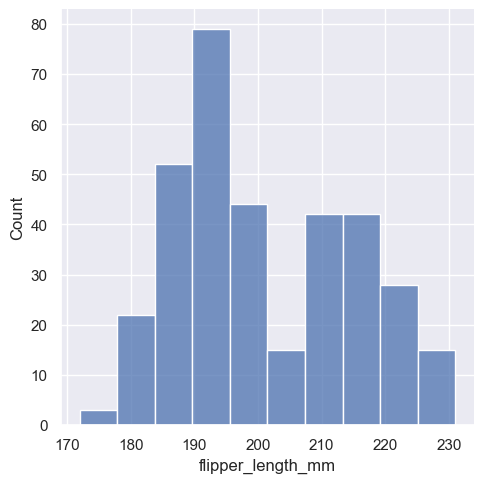

In [17]:
penguins = sns.load_dataset("penguins", data_home='seaborn_sample')
sns.displot(penguins, x="flipper_length_mm")

对于分布直方图，又一个很重要的参数就是如何划分我们的数值的区间，seaborn是会对于数据进行自动处理，但大部分情况下，我们还是需要去进行手动调节；

条件数据区间的划分有两种方式：

通过参数binwidth设置bin的宽度;

通过参数bins设置包含bin的个数；

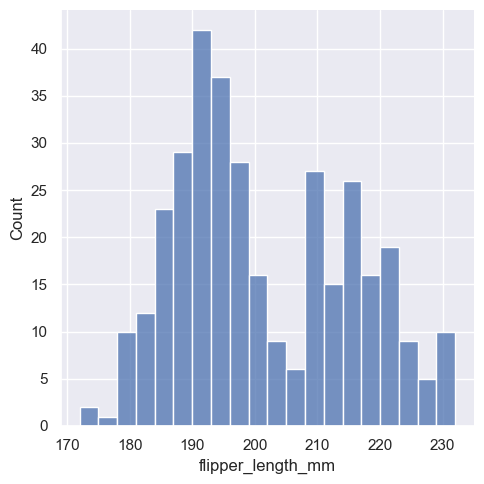

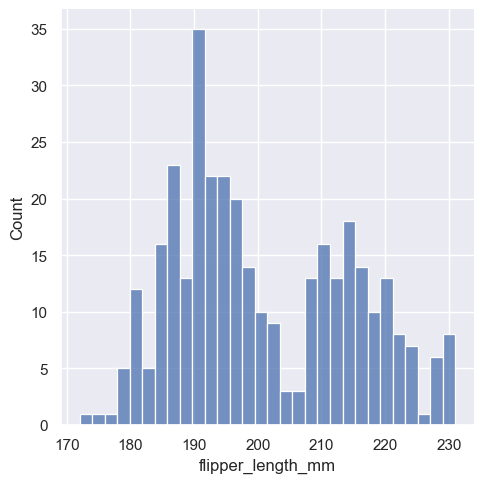

In [19]:
# 调整宽度
sns.displot(penguins, x="flipper_length_mm", binwidth=3)
sns.displot(penguins, x="flipper_length_mm", bins=30)

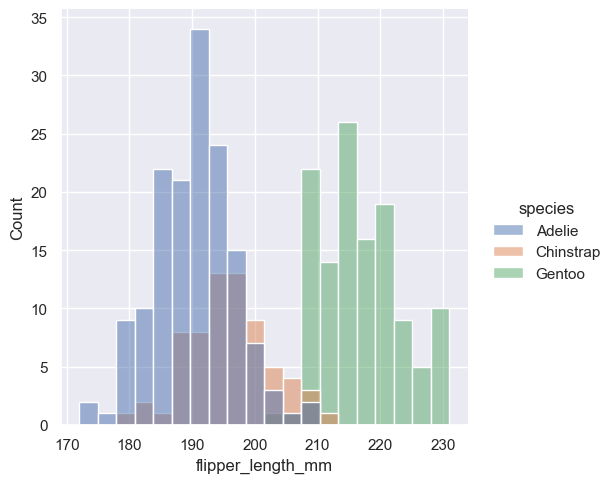

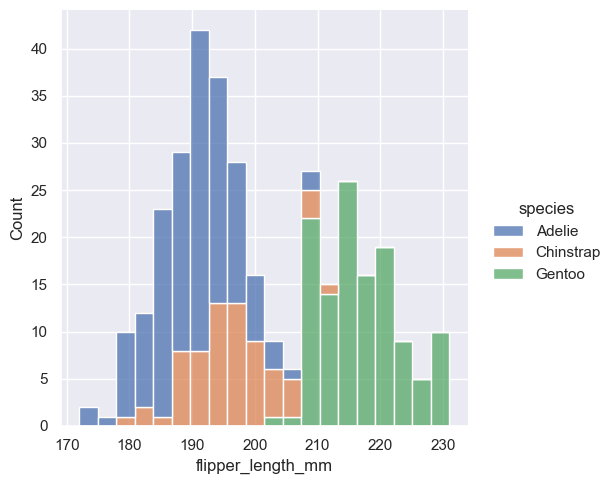

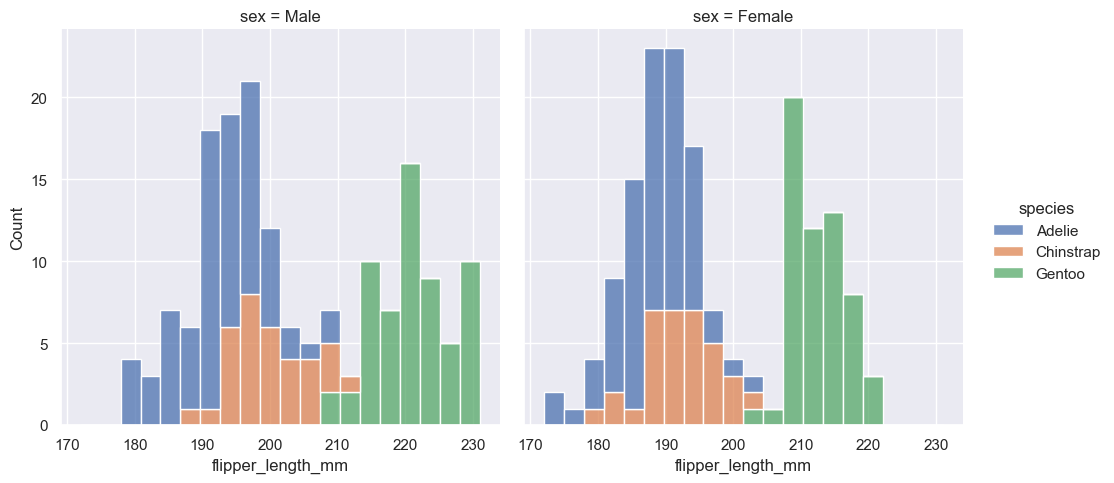

In [22]:
sns.displot(penguins, x="flipper_length_mm", hue='species', bins=20)
# 堆叠
sns.displot(penguins, x="flipper_length_mm", hue='species', multiple='stack', bins=20)
sns.displot(penguins, x="flipper_length_mm", hue='species', col='sex', multiple='stack', bins=20)

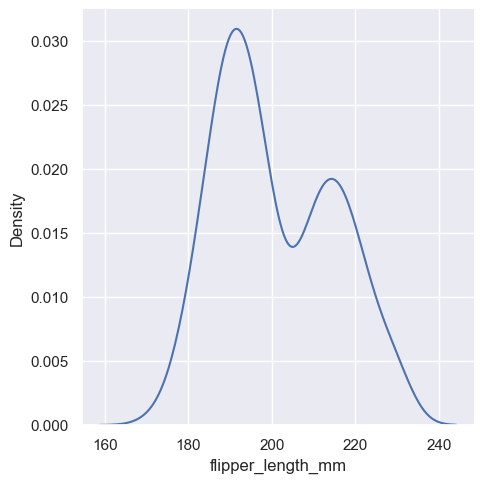

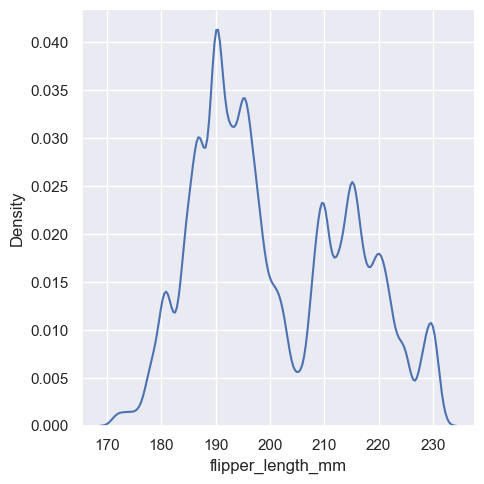

In [24]:
# 核密度函数
sns.displot(penguins, x="flipper_length_mm", kind="kde")

# 与histplot中的修改bin的宽度一样，在kdeplot中我们可以通过参数bw_adjust来调节图表的平滑程度；
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

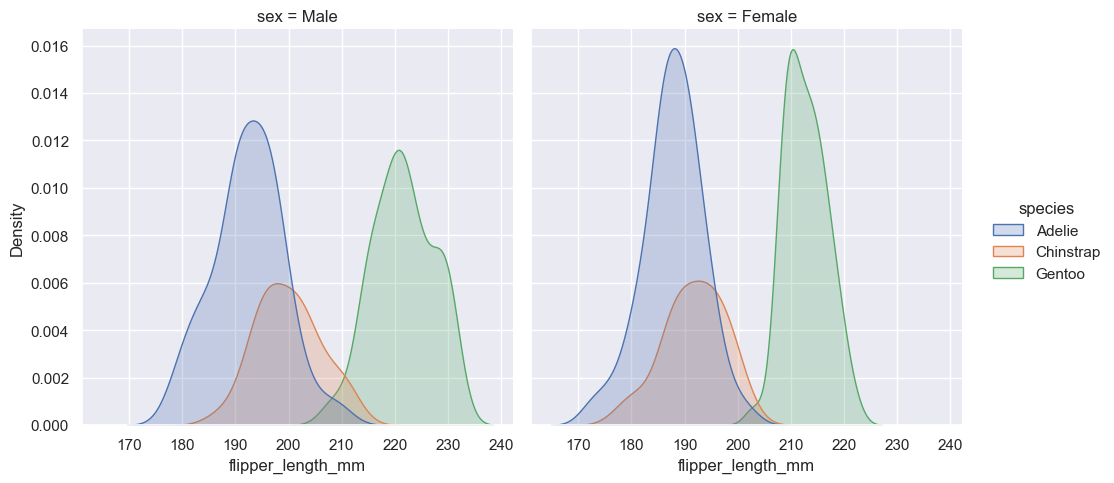

In [25]:
sns.displot(penguins, x="flipper_length_mm", hue="species", col='sex', kind="kde", fill=True)

如果我们需要使用累积概率密度图（ecdfplot），我们通过参数kind="ecdf"即可完成绘制;

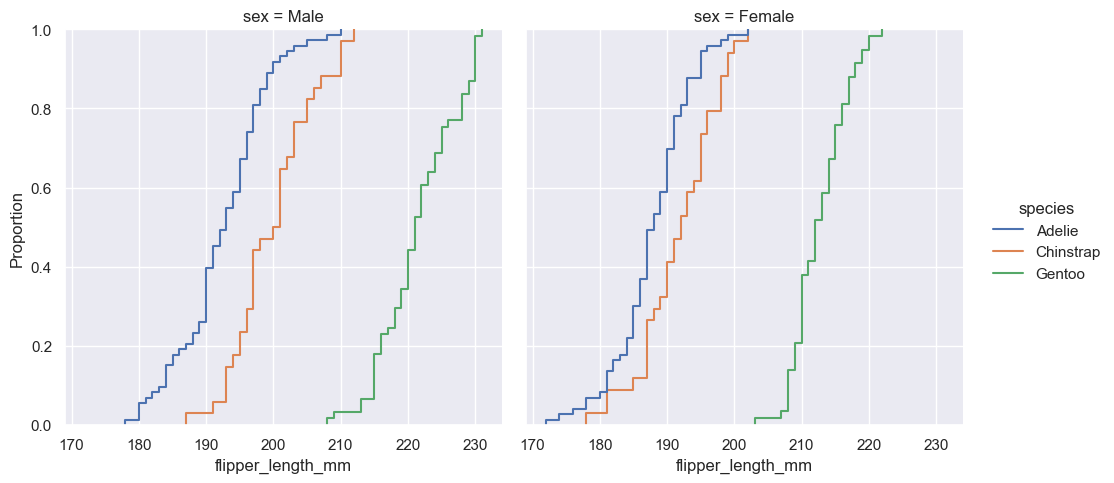

In [26]:
sns.displot(penguins, x="flipper_length_mm", hue="species", col='sex', kind="ecdf")

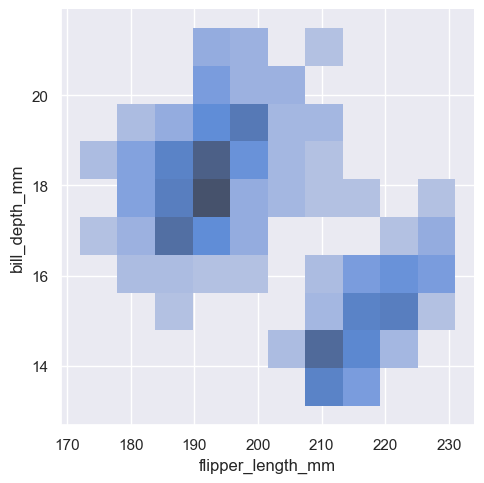

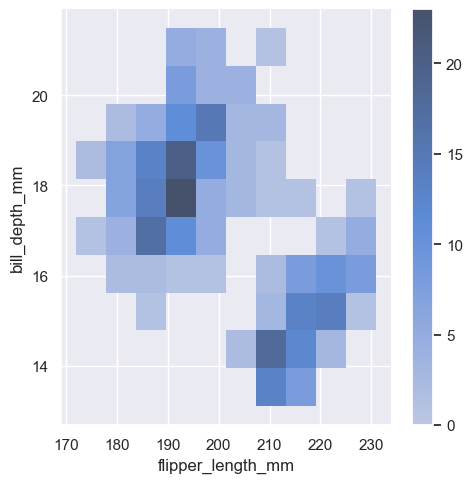

In [31]:
# 我们以上的分布图表都是基于一个度量字段进行分析的，其实我们还可以对y传入一个度量字段，用于观测整个数据的联合分布情况；
sns.displot(penguins, x="flipper_length_mm", y='bill_depth_mm')

# 添加色块
sns.displot(penguins, x="flipper_length_mm", y='bill_depth_mm', cbar=True)



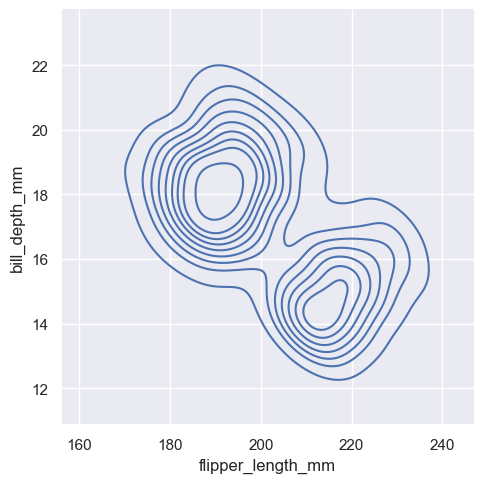

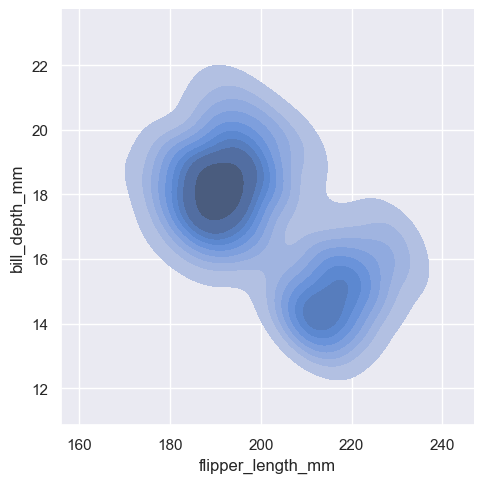

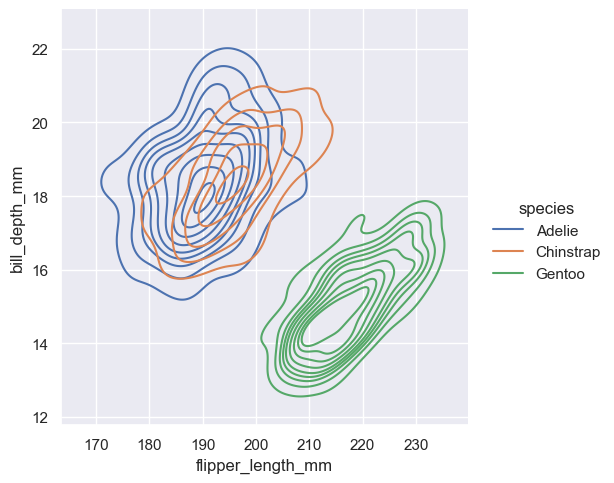

In [32]:
# 核密度
sns.displot(penguins, x="flipper_length_mm", y='bill_depth_mm', kind='kde')

# 通过参数fill=True可以设置填充颜色；
sns.displot(penguins, x="flipper_length_mm", y='bill_depth_mm', kind='kde', fill=True)
sns.displot(penguins, x="flipper_length_mm", y='bill_depth_mm', hue='species', kind='kde')

rugbplt是能够被添加到以上任何图表中的，如下所示，我们通过rug=Tue，可以让图表以一种并不起眼的方式展示数据的分布情况；

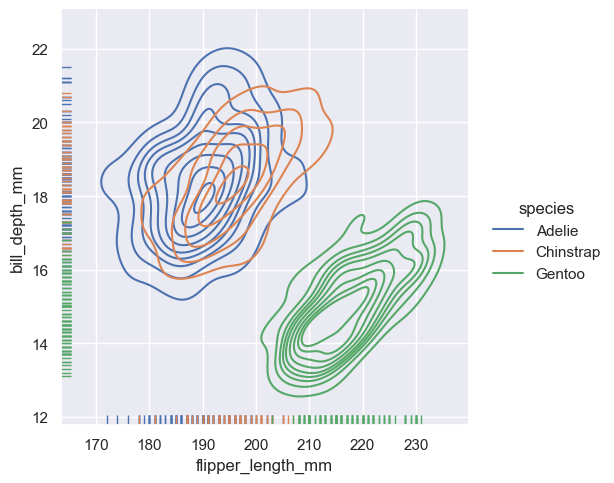

In [33]:
sns.displot(penguins, x="flipper_length_mm", y='bill_depth_mm', hue='species', kind='kde', rug=True)

分类型数据
seaborn中用于展示分类型数据的图表比较多，我们按照seaborn官方的划分成三个类型

点类型:

stripplot()(with kind="strip"; the default)

swarmplot()(with kind="swarm")

分布类型:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot()(with kind="boxen")

预估类型:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

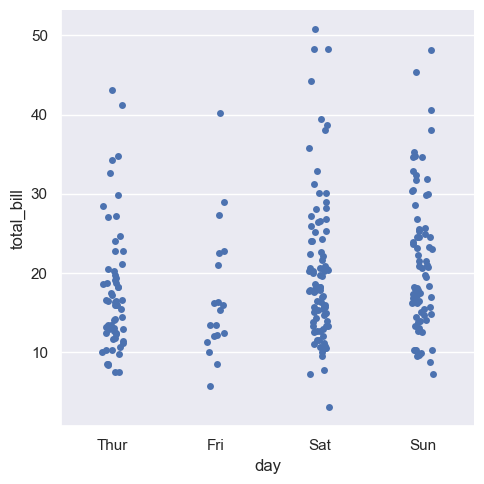

In [34]:
tips = sns.load_dataset("tips", data_home='seaborn_sample')
sns.catplot(x="day", y="total_bill", data=tips)

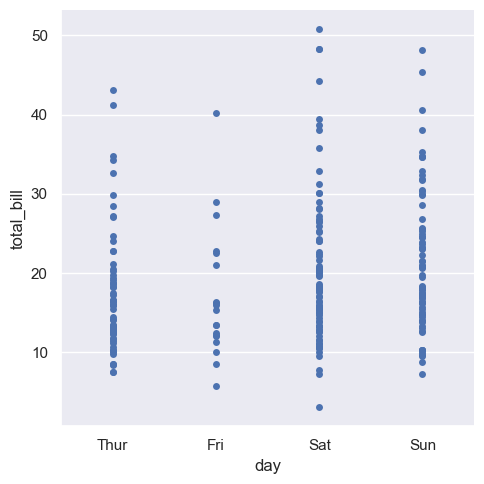

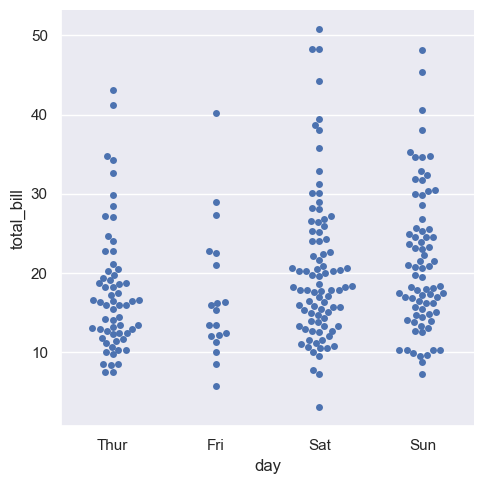

In [36]:
# seaborn默认会将点进行位置调整尽量避免重叠，我们也可以通过jitter来控制其是否调整：
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

# 还有一种防止重叠的方式便是选用swarmplot，不过会增加较大的计算开销，如果数据量过大的时候并不推荐；
sns.catplot(x="day", y="total_bill", data=tips, kind='swarm')

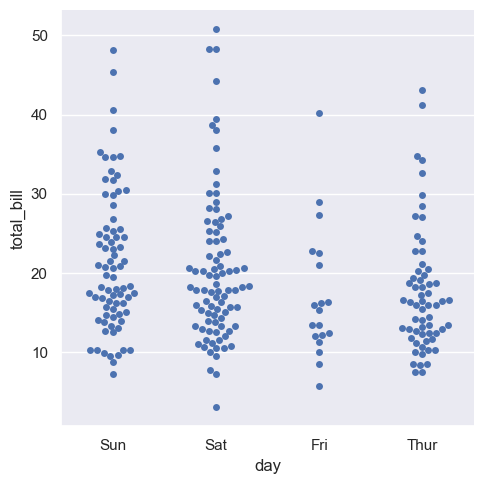

In [37]:
# 调整x轴类别的顺序可以通过order参数进行调整，如不设置，seaborn会默认根据数据中的顺序进行绘制；
sns.catplot(x="day", y="total_bill", data=tips, order=["Sun", "Sat", "Fri", "Thur"], kind='swarm')

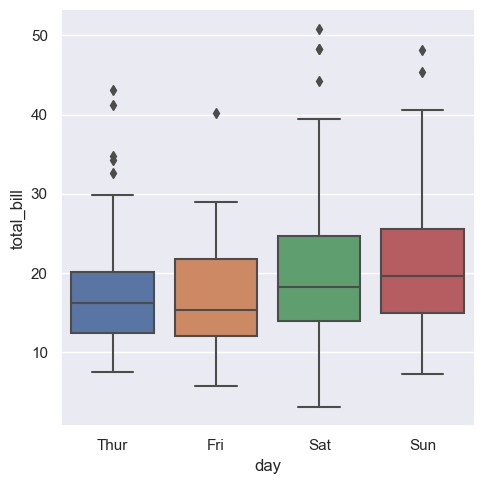

In [39]:
# 使用箱形图（boxplot）进行绘制；
sns.catplot(x='day', y='total_bill', kind='box', data=tips)

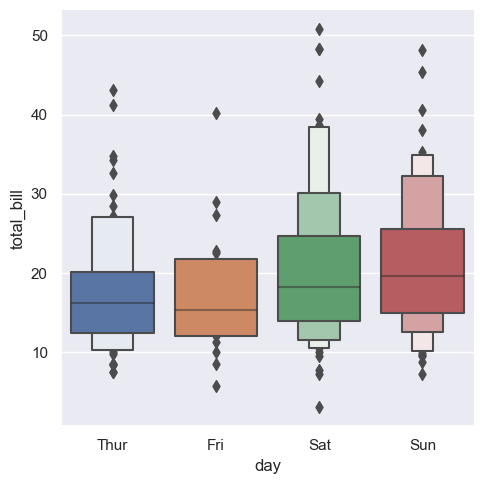

In [40]:
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips)

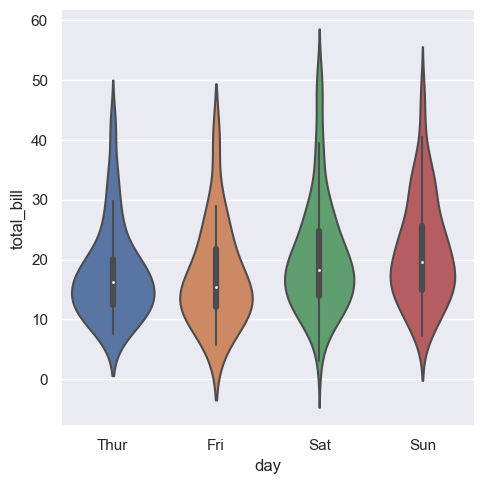

In [41]:
# 小提琴图（violinplot），这几类图表其实都非常类似，与箱形图的区别我们可以理解为直方分布图与核密度图的区别；
sns.catplot(x="day", y="total_bill", kind="violin", data=tips)

# sns.catplot(x="day", y="total_bill", kind="box", hue='time', col='sex', data=tips)

### 预估类型

上面的图表展示的数据的分布情况，但有时候我们除了想展示数据分布情况之外，还希望能够对每个类别的数据进行一个预估

以seaborn中的barplot为例，除了展示平均值意外还会通过一条小黑线展示置信区间

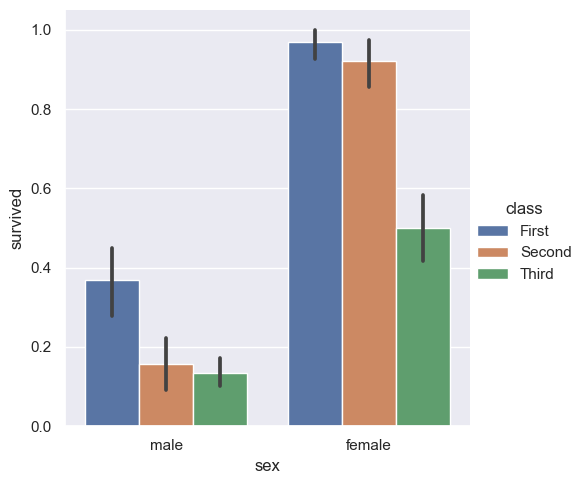

In [42]:
titanic = sns.load_dataset("titanic", data_home='seaborn_sample')
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

当你只想展示数量的时候，可以直接选择countplot，seaborn会自动计算数量，并不需要你自己通过groupby等操作后再绘制

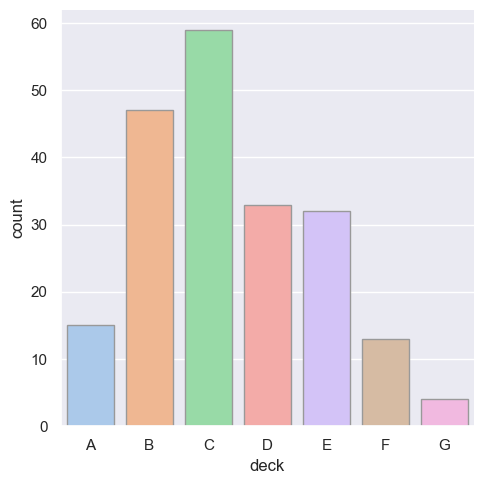

In [43]:
sns.catplot(x="deck", kind="count", data=titanic, palette="pastel", edgecolor=".6",)

pointsplot与barplot其实非常类似，pointsplot会选择通过一个点来展示平均值，而不是barplot中通过柱子来展示；

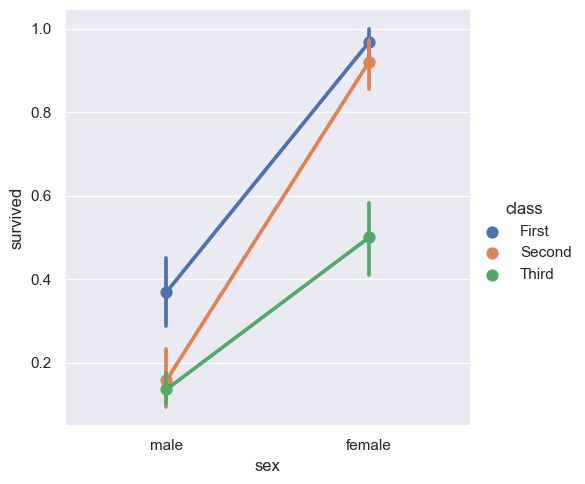

In [44]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

### 回归模型
seaborn帮助你做回归分析，主要有两个图表来进行支持：regplot和lmplot

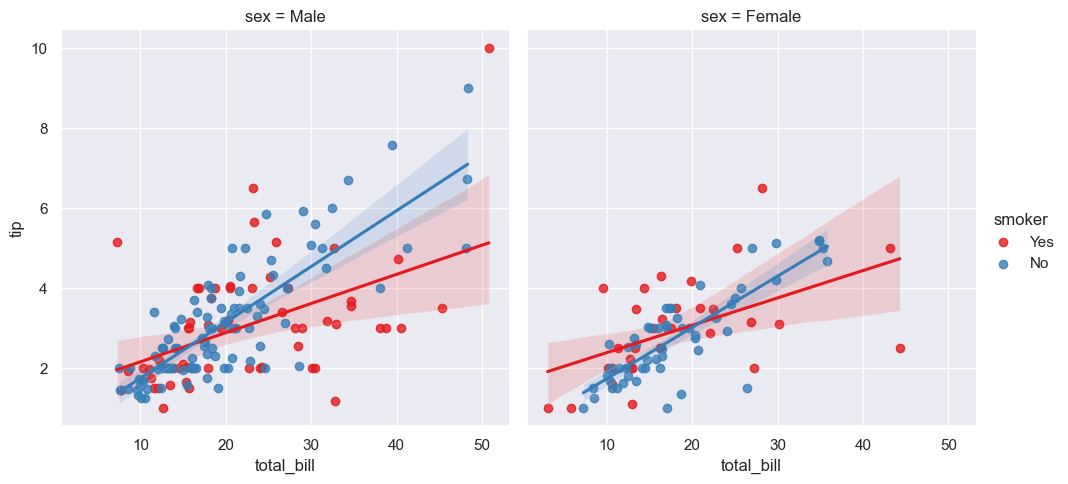

In [47]:
# lmplot会依赖数据x和y自动绘制出散点，线性回归模型以及95%的置信区间；
# sns.lmplot(x="total_bill", y="tip", data=tips)

sns.lmplot(x="total_bill", y="tip", hue='smoker', col='sex', palette="Set1", data=tips)

存在高阶关系的情况下，我们可以通过参数order来进行多项式的最高次幂

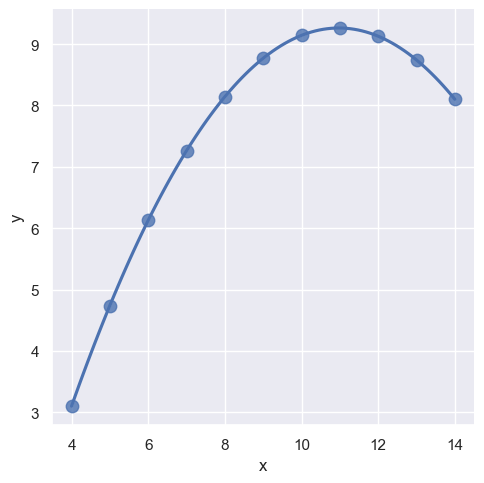

In [56]:
anscombe = sns.load_dataset("anscombe", data_home='seaborn_sample')
anscombe.head(10)

# x="x", y="y" 表示绘制 x 和 y 的回归关系
# data=anscombe.query("dataset == 'II'") 表示使用数据集 II 的数据
# order=2 表示使用二次多项式拟合
# scatter_kws={"s": 80} 设置散点图的样式，其中 {"s": 80} 表示散点的大小为80
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, scatter_kws={"s": 80})


如果数据集中存在离群点，可以通过参数robust=True来选用稳健回归模型进行绘制，默认是使用的最小二乘回归会对异常值比较敏感；

其他图表
seaborn中还有热力图，但并不归类于以上的四种类型，但在实际使用中，使用频率也叫较高的；

<Axes: >

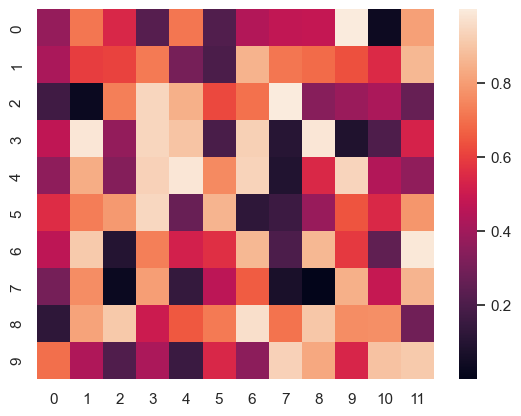

In [57]:
# 随机生成一个10*12的矩阵
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data)

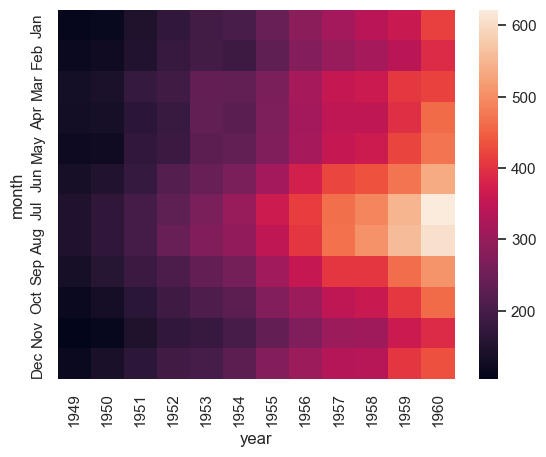

In [62]:
flights = sns.load_dataset("flights", data_home='seaborn_sample')
flights = flights.pivot(index="month", columns="year", values="passengers")
ax = sns.heatmap(flights)

<Axes: xlabel='year', ylabel='month'>

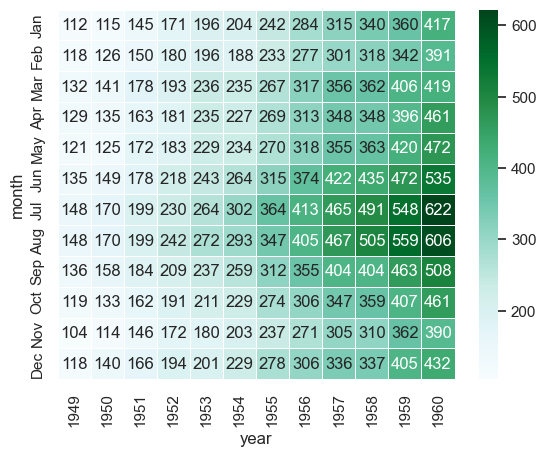

In [63]:
sns.heatmap(flights, annot=True, fmt='d',  linewidths=.5, cmap='BuGn')

# 这行代码使用 Seaborn 库中的 heatmap 函数创建一个热力图。让我解释这行代码的各个参数：

# flights: 这是你的数据，假设是一个 DataFrame。heatmap 函数通过这个数据创建热力图。

# annot=True: 这个参数表示要在每个单元格上显示数值标签（即数据点的值）。

# fmt='d': 这是一个格式化字符串，指定了数值标签的显示格式。在这里，'d' 表示显示整数。

# linewidths=.5: 这个参数控制每个单元格之间的线的宽度。设置为 0.5 使得边框线相对细。

# cmap='BuGn': 这个参数设置颜色映射，决定了图中颜色的变化范围。这里使用的是 'BuGn'，表示从蓝色到绿色的渐变。


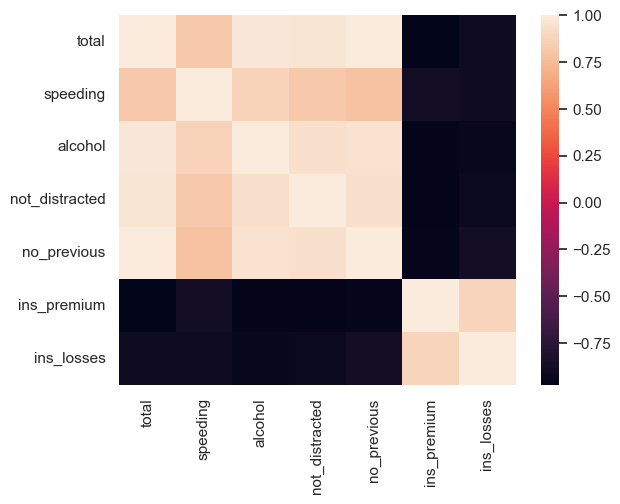

In [70]:
car_crashes = sns.load_dataset("car_crashes", data_home='seaborn_sample')
# print(car_crashes.head(10))
# Exclude non-numeric columns if needed
numeric_columns = car_crashes.select_dtypes(include='number')
# print(numeric_columns)
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
# print(correlation_matrix)
ax = sns.heatmap(correlation_matrix.corr())